In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Важная настройка для корректной настройки pipeline!
import sklearn
sklearn.set_config(transform_output="pandas")

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, OrdinalEncoder, TargetEncoder
from sklearn.model_selection import GridSearchCV, KFold
import category_encoders as ce
# for model learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

#models
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error 


# tunning hyperparamters model
import optuna

/home/evgeny/miniforge3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
path = "/home/evgeny/Documents/Elbrus Git/Project_house/project_house/house-prices-advanced-regression-techniques/train.csv"

In [5]:
df = pd.read_csv(path)
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
df[['GarageFinish', 'Street', 'FireplaceQu', 'MasVnrType','BsmtFinType1', 'BsmtExposure', 'CentralAir','GarageType', 'PoolQC','Fence','MiscFeature', ]] = df[['GarageFinish', 'Street', 'FireplaceQu', 'MasVnrType','BsmtFinType1', 'BsmtExposure', 'CentralAir','GarageType', 'PoolQC','Fence','MiscFeature' ]].fillna(0)

In [7]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Пропущено_значений': df.isnull().sum(),
    'Процент_пропусков': missing_percent
})

 #процента пропусков
missing_df = missing_df.sort_values('Процент_пропусков', ascending=False)

print("Таблица пропусков (отсортированная):")
print(missing_df.iloc[: 20])

Таблица пропусков (отсортированная):
              Пропущено_значений  Процент_пропусков
Alley                       1369          93.767123
LotFrontage                  259          17.739726
GarageCond                    81           5.547945
GarageYrBlt                   81           5.547945
GarageQual                    81           5.547945
BsmtFinType2                  38           2.602740
BsmtCond                      37           2.534247
BsmtQual                      37           2.534247
MasVnrArea                     8           0.547945
Electrical                     1           0.068493
Id                             0           0.000000
MSZoning                       0           0.000000
MSSubClass                     0           0.000000
LotArea                        0           0.000000
Street                         0           0.000000
LotShape                       0           0.000000
LandContour                    0           0.000000
HouseStyle                 

In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
drop_columns = ["PoolQC","MiscFeature","Alley", "Fence", "MasVnrType","FireplaceQu", "LotFrontage","GarageYrBlt","TotRmsAbvGrd","GarageCars","TotalBsmtSF"]
df_copy = df.drop(drop_columns, axis=1)
print(df_copy.iloc[: 20])

    Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0    1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1    2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2    3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3    4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4    5          60       RL    14260   Pave      IR1         Lvl    AllPub   
5    6          50       RL    14115   Pave      IR1         Lvl    AllPub   
6    7          20       RL    10084   Pave      Reg         Lvl    AllPub   
7    8          60       RL    10382   Pave      IR1         Lvl    AllPub   
8    9          50       RM     6120   Pave      Reg         Lvl    AllPub   
9   10         190       RL     7420   Pave      Reg         Lvl    AllPub   
10  11          20       RL    11200   Pave      Reg         Lvl    AllPub   
11  12          60       RL    11924   Pave      IR1         Lvl

In [10]:
percent = (df_copy.isnull().sum() / len(df_copy)) * 100
df_new = pd.DataFrame({
    'Пропущено_значений': df_copy.isnull().sum(),
    'Процент_пропусков': percent
})

 #процента пропусков
df_new= df_new.sort_values(by='Процент_пропусков', ascending=False, axis=0)

print("Таблица пропусков (отсортированная):")
print(df_new.iloc[: 20])

Таблица пропусков (отсортированная):
              Пропущено_значений  Процент_пропусков
GarageCond                    81           5.547945
GarageQual                    81           5.547945
BsmtFinType2                  38           2.602740
BsmtCond                      37           2.534247
BsmtQual                      37           2.534247
MasVnrArea                     8           0.547945
Electrical                     1           0.068493
Street                         0           0.000000
LotShape                       0           0.000000
MSZoning                       0           0.000000
MSSubClass                     0           0.000000
Id                             0           0.000000
LotArea                        0           0.000000
LandContour                    0           0.000000
HouseStyle                     0           0.000000
OverallQual                    0           0.000000
OverallCond                    0           0.000000
YearBuilt                  

In [11]:
number_features= df.select_dtypes(include=["int64","float64"])
category_featerus = df.select_dtypes(include="object").columns.tolist()

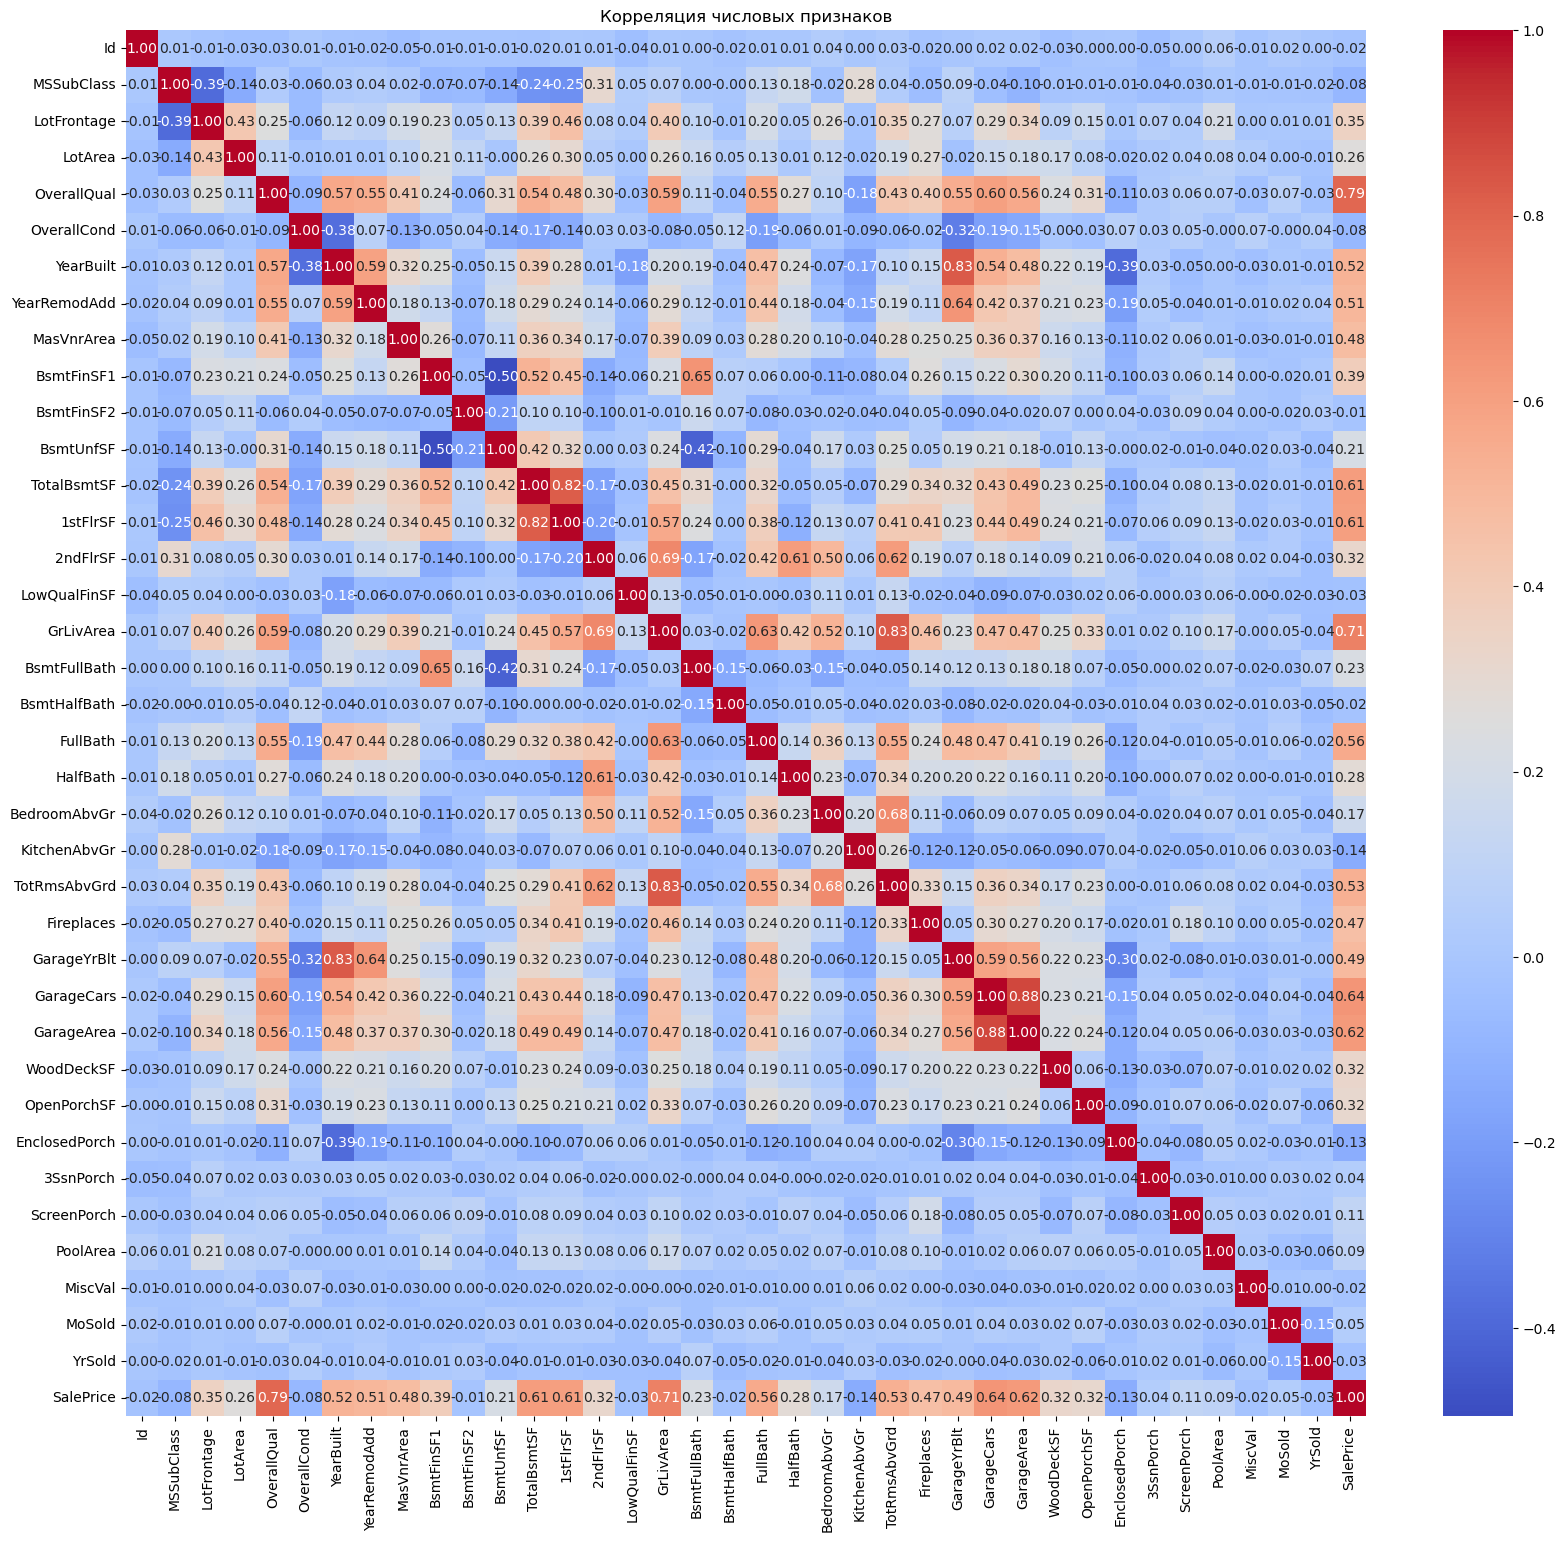

In [12]:
plt.figure(figsize=(20, 18))
sns.heatmap(number_features.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляция числовых признаков')
plt.show()

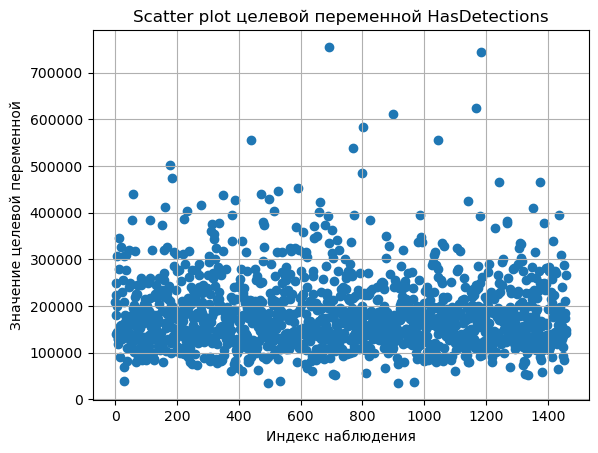

In [13]:
y =df_copy["SalePrice"]
plt.figure()
plt.scatter(range(len(y)), y)
plt.xlabel("Индекс наблюдения")
plt.ylabel("Значение целевой переменной")
plt.title("Scatter plot целевой переменной HasDetections")
plt.grid(True)
plt.show()

In [14]:
df_copy.groupby("BsmtCond").size()

BsmtCond
Fa      45
Gd      65
Po       2
TA    1311
dtype: int64

In [15]:
df_copy.groupby("BsmtFinType2").size()

BsmtFinType2
ALQ      19
BLQ      33
GLQ      14
LwQ      46
Rec      54
Unf    1256
dtype: int64

In [16]:
df_copy.groupby("GarageQual").size()

GarageQual
Ex       3
Fa      48
Gd      14
Po       3
TA    1311
dtype: int64

In [17]:
df_copy.groupby("BsmtQual").size()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
dtype: int64

In [18]:
df_copy.groupby("MasVnrArea").size()

MasVnrArea
0.0       861
1.0         2
11.0        1
14.0        1
16.0        7
         ... 
1115.0      1
1129.0      1
1170.0      1
1378.0      1
1600.0      1
Length: 327, dtype: int64

In [19]:
df_copy.head()


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [20]:
df_copy["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [21]:
X,y = df.drop("SalePrice", axis=1),df["SalePrice"]

In [22]:
X_train, X_valid, y_train, y_valid =  train_test_split(X,y, test_size=0.2, random_state=42)

In [23]:
drop_columns = ["PoolQC","MiscFeature","Alley", "Fence", "MasVnrType","FireplaceQu", "LotFrontage","GarageYrBlt","TotRmsAbvGrd","GarageCars","TotalBsmtSF"]
imputer = ColumnTransformer(
    transformers= [
        ("drop", "drop", drop_columns),
        ("num", SimpleImputer(strategy ="median"), number_features),
        ("cat", SimpleImputer(strategy="most_fecurent"), category_featerus)
    ]
)

In [24]:
# feature_columns = df_copy.columns.drop('SalePrice', errors='ignore')  # или просто data.columns, если все — признаки

# # Словарь: ключ — количество уникальных значений, значение — список имён столбцов
# columns_by_nunique = {}

# for col in feature_columns:
#     n_unique = df_copy[col].nunique(dropna=True)  # dropna=True — по умолчанию, но явно указываем
#     if n_unique not in columns_by_nunique:
#         columns_by_nunique[n_unique] = []
#     columns_by_nunique[n_unique].append(col)

# # Теперь можно создать отдельные списки, например:
# list_3 = columns_by_nunique.get(3, [])
# list_4 = columns_by_nunique.get(4, [])
# list_5 = columns_by_nunique.get(5, [])

In [25]:
encoder_and_scaler =ColumnTransformer(
transformers=[
        ('encoder', ce.CatBoostEncoder(), category_featerus),
        ('scaler', StandardScaler(), number_features)
    ],
    verbose_feature_names_out=False,
    remainder= 'passthrough'
)

In [26]:
preprocessor = Pipeline([
    ("imputer", imputer), 
    ("encoder_and_scaler", encoder_and_scaler)
]
)

In [27]:
preprocessor

,steps,"[('imputer', ...), ('encoder_and_scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('drop', ...), ('num', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [29]:
models = {
    "linereg": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "KNN": KNeighborsRegressor(),
    "XGB": XGBRegressor(),
    "LGBM": LGBMRegressor()}
`
result = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    
    r2 = r2_score(y_valid, y_pred)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    mae = mean_absolute_error(y_valid, y_pred)
    rmlse = np.sqrt(mean_squared_log_error(y_valid, y_pred))
    
    
    result[name]={
        "model": model,
        "r2": r2,
        "rmse": rmse,
        "mae": mae,
        "rmlse": rmlse        
    }
    print(f" {name} / {r2:.4f} / {rmse:.4f} / {mae:.4f} / {rmlse:.4f} ")
    
result_df = pd.DataFrame([{
    "model": name,
    "r2": metrics["r2"],
    "rmse": metrics["rmse"],
    "mae": metrics["mae"],
    "rmlse": metrics["rmlse"],
}
for name, metrics in result.items()
                              
]) 

print(result_df.to_string(index=False))

SyntaxError: invalid syntax (3131163593.py, line 10)